### ARMA Model

In [11]:
import numpy as np
import pandas as pd

from quantifilib.generator.linear_models import ARMAGenerator

process = ARMAGenerator.from_params(
    {'p': (0.8, -0.3, 0.1), 'q': (0.4, 0.1)}, 
    u='normal'
)
simulation = process.generate_simulation(
    n = 252, 
    burn_in=100, 
    n_series = 100
)

<Axes: >

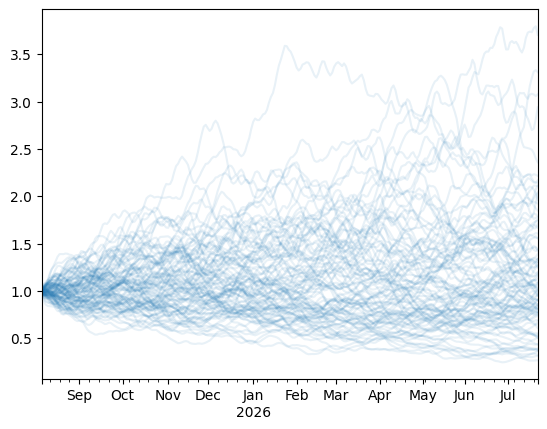

In [12]:
(1 + simulation).cumprod().plot(
    legend=False, 
    color = 'tab:blue',
    alpha = 0.1
)

### SARIMA Model

In [13]:
from quantifilib.generator.linear_models import SARIMAGenerator

params = {
    'p': (0.8,-0.3,0.1),
    'q': (0.3,)
}

seasonal_params = {
    'P': (0.6,0.2),
    'Q': (0.4,),
    's': 12
}

sarima_gen = SARIMAGenerator.from_params(
    params=params,
    seasonal_params=seasonal_params,
    u='normal',
    u_params=(0, 0.02)
)

simulated_df = sarima_gen.generate_simulation(n=252, n_series=10)

<Axes: >

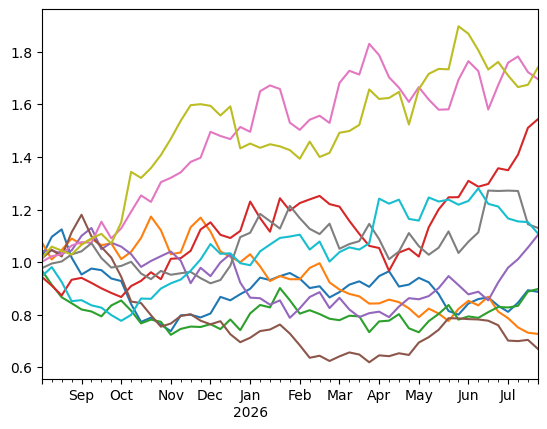

In [14]:
(1+simulated_df).cumprod().resample('W-FRI').last().plot(legend = False)

### Vectorized ARMA Model

In [15]:
from quantifilib.generator.linear_models import VARMAGenerator

# AR(1) VAR with 2 variables
A1 = np.array(
    [
        [0.5, 0.1], 
        [0.05, 0.4]
    ]
)  # shape (2, 2)
ar = np.stack([A1], axis=2)  # shape (2, 2, 1)

# MA(1) component (optional)
M1 = np.array(
    [
        [0.3, 0.1], 
        [-0.1, 0.2]
    ]
)
ma = np.stack([M1], axis=2)

params = {
    'ar': ar,
    'ma': ma  # or skip for pure VAR
}

varma_gen = VARMAGenerator.from_params(params=params, u='normal', u_params=(0, 0.01))
sim_df = varma_gen.generate_simulation(n = 252)

<Axes: >

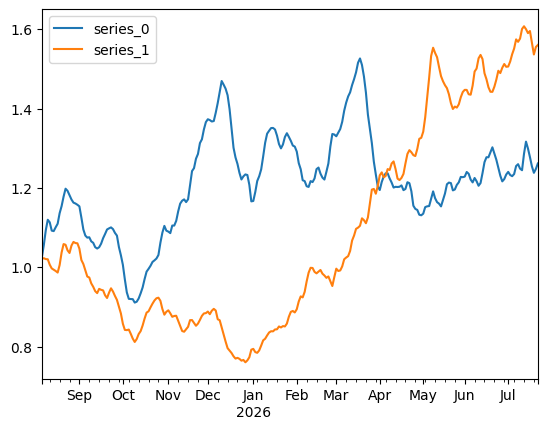

In [16]:
(1+sim_df).cumprod().plot()

### ARFIMA Model

In [17]:
from quantifilib.generator.linear_models import ARFIMAGenerator
params = {
    'p': (0.9, 0.3, -0.4), 
    'q': (0.9, )
}
d = 0.55  # Long memory parameter

generator = ARFIMAGenerator.from_params(
    params = params, 
    d = d, 
    u = 'normal', 
    u_params = (0, 0.01)
)
simulated_df = generator.generate_simulation(
    n = 750, 
    n_series = 2, 
    burn_in = 300
)

<Axes: >

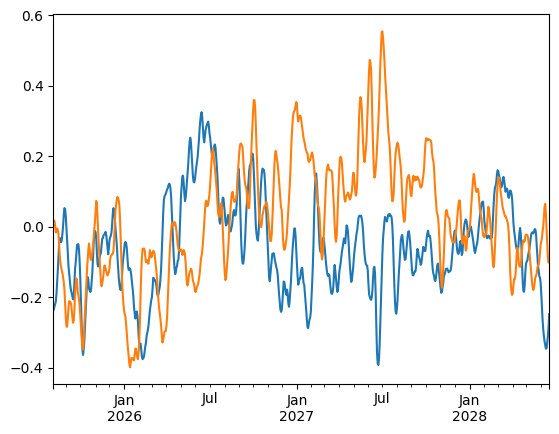

In [18]:
simulated_df.plot(legend = False)

### ARCH Model

In [28]:
from quantifilib.generator.heteroscedastic_models import ARCHGenerator

arch = ARCHGenerator.from_params(
    {'omega': 1e-6, 'alpha': (0.4, 0.32, 0.11)}, 
    u='normal'
)
ret_df = arch.generate_simulation(
    n=252, 
    n_series=2
)
sigma_df = arch.get_conditional_volatility(ret_df, ret="sigma")

<Axes: >

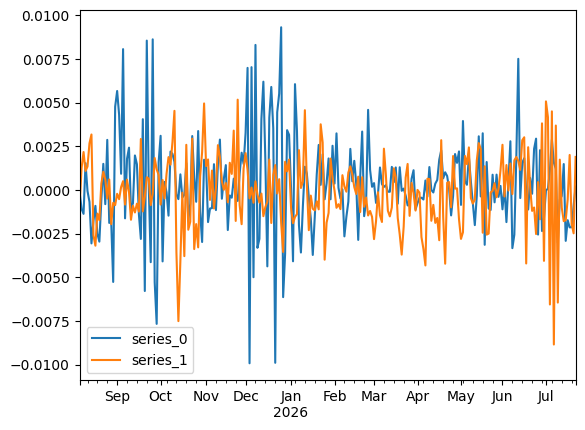

In [29]:
ret_df.plot()

<Axes: >

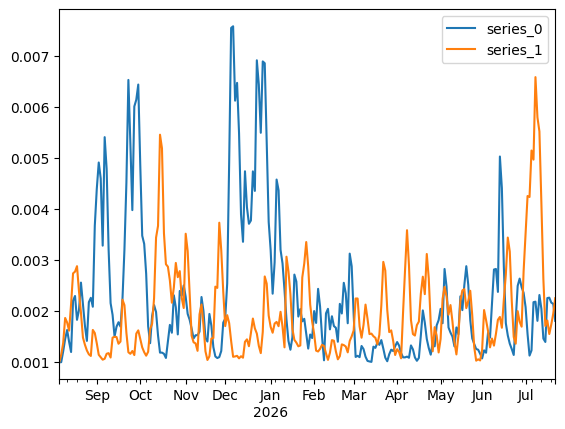

In [30]:
sigma_df.plot()

### GARCH Model

In [42]:
from quantifilib.generator.heteroscedastic_models import GARCHGenerator

garch = GARCHGenerator.from_params(
    {'omega': 1e-6, 'alpha': (0.55, 0.12), 'beta': (0.3,)}
)
ret_df2 = garch.generate_simulation(
    n = 252, 
    n_series=2
)
sig2_series = garch.get_conditional_volatility(
    ret_df2,
    ret="sig2"
)

<Axes: >

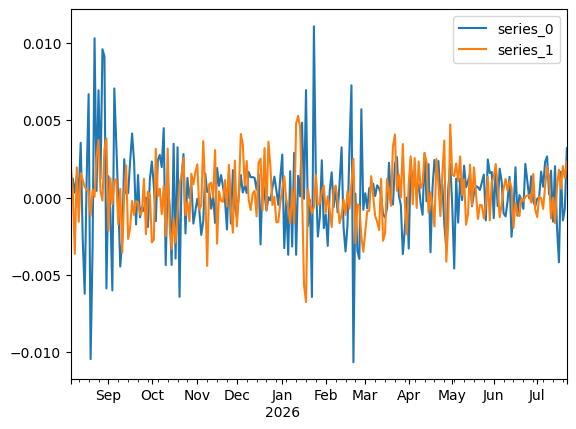

In [43]:
ret_df2.plot()

<Axes: >

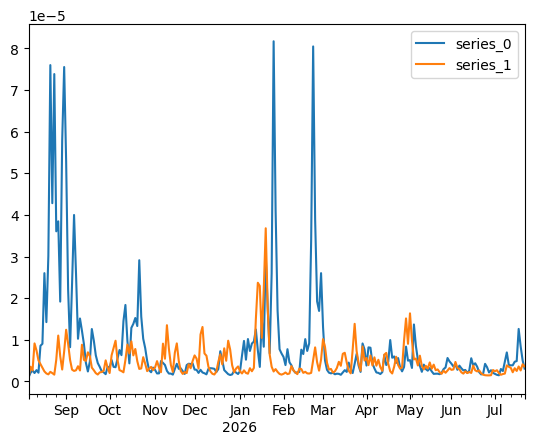

In [44]:
sig2_series.plot()

### Geometric Brownian Motion

In [1]:
from quantifilib.generator.stochastic_models import GBMGenerator

gbm = GBMGenerator.from_params(
    params = {
        'mu': 0.08, 
        'sigma': 0.2, 
        'S0': 100.0, 
        'dt': 1/252
    }
)
prices = gbm.generate_simulation(
    n=252, 
    n_series=10, 
    return_type="price"
)

<Axes: >

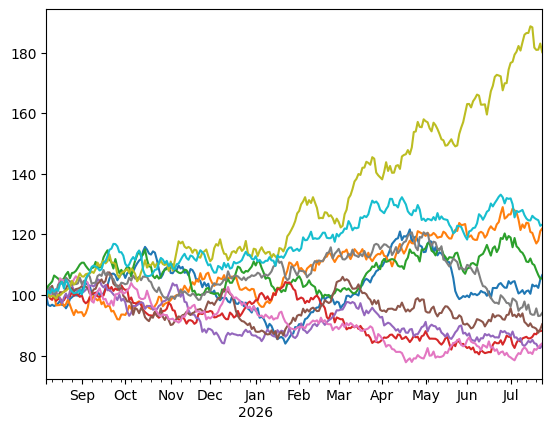

In [2]:
prices.plot(legend = False)

### Ornstein Uhlenbeck Model

In [3]:
from quantifilib.generator.stochastic_models import OUGenerator

ou = OUGenerator.from_params(
    params = {
        'kappa': 2.0, 
        'theta': 0.0, 
        'sigma': 0.3, 
        'dt': 1/252
    }
)
x = ou.generate_simulation(
    n=252, 
    n_series=10, 
    return_type="level", 
    stationary_start=True
)

<Axes: >

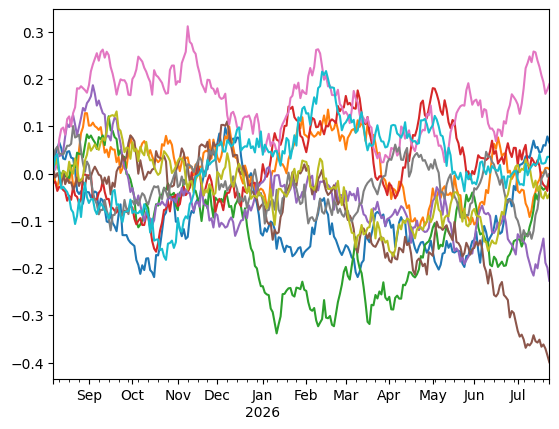

In [4]:
x.plot(legend = False)

### Merton Jump Diffusion Model

In [8]:
from quantifilib.generator.stochastic_models import JumpDiffusionGenerator

jd = JumpDiffusionGenerator.from_params(
    params = {
        'mu': 0.08, 
        'sigma': 0.20, 
        'S0': 100.0, 
        'dt': 1/252,
        'lambda': 0.2,          # ~0.2 jumps per year-step if dt=1
        'jump_mu': -0.02,       # average log-jump
        'jump_sigma': 0.10      # jump volatility (log space)
    }
)
prices = jd.generate_simulation(
    n=252, 
    n_series=10, 
    return_type="price"
) 

<Axes: >

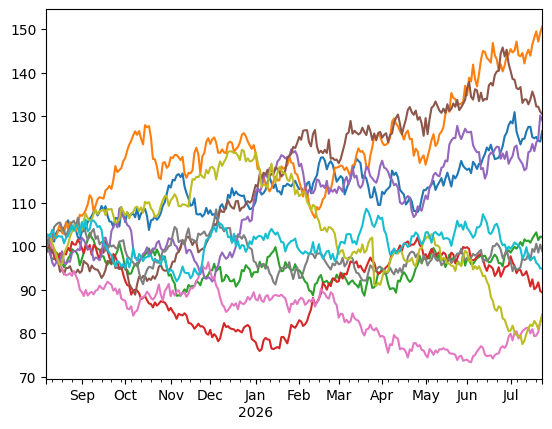

In [9]:
prices.plot(legend = False)